# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

- Nama: Abdul Jabbar Robbani
- Email: jabbarrobbani@gmail.com
- Id Dicoding: <a href='https://www.dicoding.com/users/bluevita/'>bluevita</a>
- Github: <a href='https://github.com/bluevita/Submission-Dicoding-Belajar-Data-Analytics-dengan-Python-'>bluevita</a>

# Menentukan Pertanyaan Bisnis

- 1. Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda (baik Casual ataupun Registered)?
- 2. Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?
- 3. Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?
- 4. Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?
- 5. Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?
- 6. Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?

<!-- - **Specific**: What is the total count of rental bikes (cnt) for the year 2012 during the fall season (season 3)?
- **Measurable**: How many rental bikes were used on holidays (holiday = 1) during the summer season (season 2) in 2011?
- **Action-oriented**: How can we increase the number of rental bikes used by casual users (casual) on weekdays (workingday = 1)?
- **Relevant**:
    - What is the relationship between temperature (temp) and the number of registered users (registered)?
    - What effect does the weather (weathersit) have on the number of bicycle rentals (cnt) during autumn (season 3)?
- **Time-bound**: What was the hourly distribution of rental bikes (cnt) on Christmas Day (holiday = 1) in 2012 (yr = 1)? -->

# Menyiapkan semua library yang dibutuhkan

In [14]:
# Library
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from datetime import datetime

# Data Wrangling

## Gathering Data

Pada tahap ini kita akan mengumpulkan data-data yang telah kita kumpulkan. Karena saya memilih Dataset **Bike Sharing**, saya mengimpor file **day.csv** dan **hour.csv**.

In [15]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/bluevita/Submission-Dicoding-Belajar-Data-Analytics-dengan-Python-/main/content/day.csv \
  -O /content/day.csv

--2023-12-12 12:09:59--  https://raw.githubusercontent.com/bluevita/Submission-Dicoding-Belajar-Data-Analytics-dengan-Python-/main/content/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56837 (56K) [text/plain]
Saving to: ‘/content/day.csv’

/content/day.csv    100%[===================>]  55.50K  --.-KB/s    in 0.009s  

2023-12-12 12:09:59 (5.98 MB/s) - ‘/content/day.csv’ saved [56837/56837]



In [16]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/bluevita/Submission-Dicoding-Belajar-Data-Analytics-dengan-Python-/main/content/hour.csv \
  -O /content/hour.csv

--2023-12-12 12:09:59--  https://raw.githubusercontent.com/bluevita/Submission-Dicoding-Belajar-Data-Analytics-dengan-Python-/main/content/hour.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1139356 (1.1M) [text/plain]
Saving to: ‘/content/hour.csv’

/content/hour.csv   100%[===================>]   1.09M  --.-KB/s    in 0.04s   

2023-12-12 12:09:59 (26.4 MB/s) - ‘/content/hour.csv’ saved [1139356/1139356]



**Load tabel day**

In [17]:
# Membaca data dari file CSV dengan nama "./content/day.csv" dan menyimpannya dalam DataFrame df_day
df_day = pd.read_csv("../content/day.csv")

# Menampilkan beberapa baris pertama dari DataFrame df_day
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Load tabel hour**

In [18]:
# Membaca data dari file CSV dengan nama "/content/hour.csv" dan menyimpannya dalam DataFrame df_hour
df_hour = pd.read_csv("../content/hour.csv")

# Menampilkan beberapa baris pertama dari DataFrame df_hour
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Data Type

**Menilai data df_day**

In [19]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_day.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 731
Jumlah Kolom: 16


In [20]:
# Memeriksa tipe data setiap kolom
tipe_data = df_day.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Data set terdiri dari 731 baris dan 16 kolom dengan tipe data yang beragam. Kolom-kolom seperti instant, season, yr, dan lainnya memiliki tipe data int64 dan float64, mengindikasikan sifat numerik. Terdapat pula kolom dteday yang berisi tanggal dengan tipe data objek, sebaiknya diubah ke tipe data datetime. Variabel kategorikal seperti season, yr, dan sebagainya direpresentasikan secara numerik. Kolom cnt mungkin merupakan target variabel yang ingin diprediksi. Rekomendasi untuk langkah selanjutnya termasuk konversi tipe data dteday menjadi datetime, eksplorasi statistik deskriptif untuk variabel numerik, analisis distribusi data untuk variabel kategorikal, serta visualisasi data untuk mendapatkan wawasan tentang tren dan pola. Korelasi antara variabel numerik dan variabel target cnt juga perlu diperiksa untuk pemahaman yang lebih mendalam tentang hubungan antar variabel.

In [21]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_day.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


(✓) Dari hasil pemeriksaan pada dataset df_day, tidak ada nilai yang hilang atau kosong.

In [22]:
# Memeriksa apakah ada nilai yang duplikat
print("\nJumlah Duplikat :", df_day.duplicated().sum())


Jumlah Duplikat : 0


(✓) Tidak ada data yang duplicate.

In [23]:
# Menggunakan fungsi describe() untuk menghasilkan deskripsi statistik dari DataFrame df_day
# Parameter include="all" memastikan bahwa deskripsi mencakup semua jenis data, termasuk data non-numerik
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**(⁜) Descriptive Analysis**

1. Dataset day
    - Jumlah data: 731 entri.
    - Musim paling umum: Musim panas (season 2).
    - Tahun yang dominan: 2012 (yr = 1).
    - Bulan yang paling sering muncul: Juli (mnth 7).
    - Hari libur hanya ada sekitar 2.87% dari total hari.
    - Hari kerja adalah mayoritas (sekitar 68.40%).
    - Cuaca rata-rata pada keadaan yang baik (weathersit 1).
    - Suhu rata-rata adalah sekitar 0.50 (41°C), dengan suhu perasaan rata-rata sekitar 0.47 (50°C).
    - Kelembaban rata-rata sekitar 0.47 (47%).
    - Kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal).
    - Jumlah pengguna casual rata-rata sekitar 848.
    - Jumlah pengguna terdaftar rata-rata sekitar 3656.
    - Total rental rata-rata sekitar 4504 per hari.

In [24]:
# Menggunakan fungsi nunique() untuk menghitung jumlah nilai unik dalam setiap kolom dari DataFrame df_day
# Hasilnya akan memberikan wawasan tentang variasi data dan keberagaman nilai dalam setiap atribut
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Hasil dari penggunaan fungsi nunique() pada DataFrame df_day menunjukkan beberapa aspek penting dalam data. Kolom instant dan dteday memiliki jumlah nilai unik yang sama dengan jumlah baris, menandakan setiap entri memiliki nilai yang berbeda. Variabel kategorikal seperti season, yr, dan lainnya memiliki jumlah nilai unik sesuai dengan kategori yang diharapkan. Adanya empat nilai unik dalam kolom season dan dua nilai unik dalam kolom yr mengindikasikan mungkin adanya empat musim dan dua tahun dalam dataset. Variabel numerik seperti temp, atemp, hum, windspeed, casual, registered, dan cnt menunjukkan variasi dan ragam yang signifikan, tercermin dari jumlah nilai unik yang tinggi.

In [25]:
# Menggunakan fungsi head() untuk menampilkan beberapa baris pertama dari DataFrame df_day
# Ini membantu memberikan gambaran awal tentang struktur dan isi data di dalam DataFrame
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hasil dari fungsi head() pada DataFrame df_day memberikan wawasan awal tentang struktur dan isi data. Kolom instant terlihat berperan sebagai kolom identitas atau nomor urut tanpa memberikan informasi yang signifikan. Kolom dteday mencakup tanggal dengan format yang sesuai, memberikan potensi untuk analisis berbasis waktu. Variabel musiman direpresentasikan oleh kolom season dengan nilai numerik yang menggambarkan musim. Beberapa variabel kategorikal seperti yr, holiday, weekday, workingday, dan weathersit menyajikan informasi tentang tahun, hari libur, hari dalam seminggu, hari kerja, dan situasi cuaca, masing-masing. Variabel numerik seperti temp, atemp, hum, dan windspeed mungkin merepresentasikan suhu, suhu terasa, kelembaban, dan kecepatan angin. Selain itu, terdapat variabel target, yaitu casual, registered, dan cnt, dengan cnt mungkin mencakup total peminjaman sepeda dari casual dan registered.

In [26]:
# Menampilkan informasi tentang DataFrame df_day menggunakan fungsi info()
print('Dataframe day:')
print(df_day.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


(!) Berdasarkan hasil observasi pada df_day, terdapat kesalahan dalam jenis data pada kolom dteday yang awalnya berupa objek, tetapi seharusnya berupa tipe data datetime.

**Menilai data df_hour**

In [27]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_hour.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 17379
Jumlah Kolom: 17


In [28]:
# Memeriksa tipe data setiap kolom
tipe_data = df_hour.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Dataset ini terdiri dari 17.379 baris dan 17 kolom. Kolom-kolom tersebut melibatkan berbagai tipe data, diantaranya variabel numerik seperti instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt. Kolom dteday merupakan variabel berjenis objek yang mungkin berisi informasi tanggal, dan sebaiknya dikonversi ke tipe data datetime untuk analisis berbasis waktu yang lebih akurat. Variabel season, yr, mnth, hr, holiday, weekday, dan weathersit terlihat sebagai variabel kategorikal dengan tipe data numerik.

In [29]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_hour.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


(✓) Dari hasil pemeriksaan pada dataset df_hour, tidak ada nilai yang hilang atau kosong.

In [30]:
# Memeriksa apakah ada nilai yang duplikat
print("\nJumlah Duplikat :", df_hour.duplicated().sum())


Jumlah Duplikat : 0


(✓) Tidak ada data yang duplicate.

In [31]:
# Menggunakan fungsi describe() untuk menghasilkan deskripsi statistik dari DataFrame df_hour
# Parameter include="all" memastikan bahwa deskripsi mencakup semua jenis data, termasuk data non-numerik
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**(⁜) Descriptive Analysis**
1. Dataset hour
    - Dataset terdiri dari 17,379 entri.
    - Rata-rata kolom-kolom utama adalah sekitar:
        - Musim (season) 2.50, menunjukkan musim rata-rata.
        - Tahun (yr) 0.50, mengindikasikan perbandingan antara tahun 2011 dan 2012.
        - Bulan (mnth) 6.54, menunjukkan bulan rata-rata dalam setahun.
        - Jam (hr) 11.55, mengindikasikan jam rata-rata dalam sehari.
        - Hari libur (holiday) 0.03, persentase hari libur.
        - Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
        - Hari kerja (workingday) 0.68, persentase hari kerja.
        - Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
        - Suhu (temp) 0.50, suhu rata-rata yang normal.
        - Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
        - Kelembaban (hum) 0.48, kelembaban rata-rata.
        - Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
        - Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
        - Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
        - Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

In [32]:
# Menggunakan fungsi nunique() untuk menghitung jumlah nilai unik dalam setiap kolom dari DataFrame df_hour
# Hasilnya akan memberikan wawasan tentang variasi data dan keberagaman nilai dalam setiap atribut
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

Hasil dari fungsi nunique() pada DataFrame df_hour memberikan gambaran tentang variasi dan keberagaman nilai dalam setiap atribut. Kolom instant memiliki 17.379 nilai unik, mencerminkan identitas setiap entri atau baris dalam dataset. Kolom dteday memiliki 731 nilai unik, yang sesuai dengan jumlah hari yang tercakup dalam dataset dan menandakan karakter data berbasis waktu. Variabel kategorikal seperti season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit menunjukkan variasi dalam jumlah nilai unik, mencerminkan ragam dalam musim, tahun, bulan, jam, hari libur, hari dalam seminggu, hari kerja, dan situasi cuaca. Variabel numerik seperti temp, atemp, hum, windspeed, casual, registered, dan cnt menunjukkan variasi yang signifikan, dengan cnt yang mungkin mencakup total dari peminjaman sepeda oleh pelanggan casual dan terdaftar.

In [33]:
# Menggunakan fungsi head() untuk menampilkan beberapa baris pertama dari DataFrame df_hour
# Ini membantu memberikan gambaran awal tentang struktur dan isi data di dalam DataFrame
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melalui hasil fungsi head() pada DataFrame df_hour, kita dapat mengamati karakteristik awal dari dataset. Kolom instant menunjukkan nomor identifikasi atau urutan entri dengan nilai berturut-turut. Kolom dteday mencakup informasi tanggal dalam format yang sesuai, memberikan landasan untuk analisis berbasis waktu. Variabel musiman direpresentasikan oleh kolom season dengan nilai numerik (1-4), menggambarkan musim dalam setahun. Kolom yr dan mnth mengindikasikan tahun dan bulan, sementara kolom hr menyajikan informasi jam pada format 24 jam. Variabel kategorikal seperti holiday, weekday, workingday, dan weathersit menyediakan detail tentang apakah hari tersebut hari libur, hari dalam seminggu, hari kerja, dan situasi cuaca. Kolom numerik seperti temp, atemp, hum, dan windspeed memberikan informasi tentang suhu, suhu terasa, kelembaban, dan kecepatan angin. Variabel target terdiri dari casual, registered, dan cnt, dengan cnt mungkin mencakup total dari peminjaman sepeda oleh pelanggan casual dan terdaftar.

In [34]:
# Menampilkan informasi tentang DataFrame df_hour menggunakan fungsi info()
print('\nDataframe hour:')
print(df_hour.info())


Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


(!) Berdasarkan hasil observasi pada df_day, terdapat kesalahan dalam jenis data pada kolom dteday yang awalnya berupa objek, tetapi seharusnya berupa tipe data datetime.

## Cleaning Data

### Fixed data type

In [35]:
# Mengonversi kolom "dteday" di df_day ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

# Mengubah kolom "dteday" dalam format df_hour menjadi format datetime
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [36]:
# Periksa tipe data untuk kolom "dteday" di df_day
print('df_day["dteday"] : ', df_day["dteday"].dtypes)

# Periksa tipe data untuk kolom "dteday" di df_hour
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]



Dengan mengonversi kolom "dteday" di DataFrame df_day dan df_hour ke format datetime, kita telah berhasil mengubah tipe data kolom tersebut menjadi datetime64[ns]. Hal ini memungkinkan kita untuk melakukan analisis berbasis waktu dengan lebih akurat, seperti mengidentifikasi tren harian, bulanan, atau musiman. Proses konversi ini memberikan kemudahan dalam memanipulasi dan mengeksplorasi data berdasarkan aspek temporal. Dengan kolom "dteday" yang telah dikonversi, kita dapat melanjutkan dengan eksplorasi lebih lanjut, seperti visualisasi atau analisis statistik berdasarkan urutan waktu. Selain itu, data yang berbasis waktu juga dapat digunakan untuk membangun model prediktif yang memperhitungkan faktor waktu dalam prediksi peminjaman sepeda atau variabel target lainnya.

# Exploratory Data Analysis (EDA)

**Hubungan antara penyewa casual, registered, dan count**

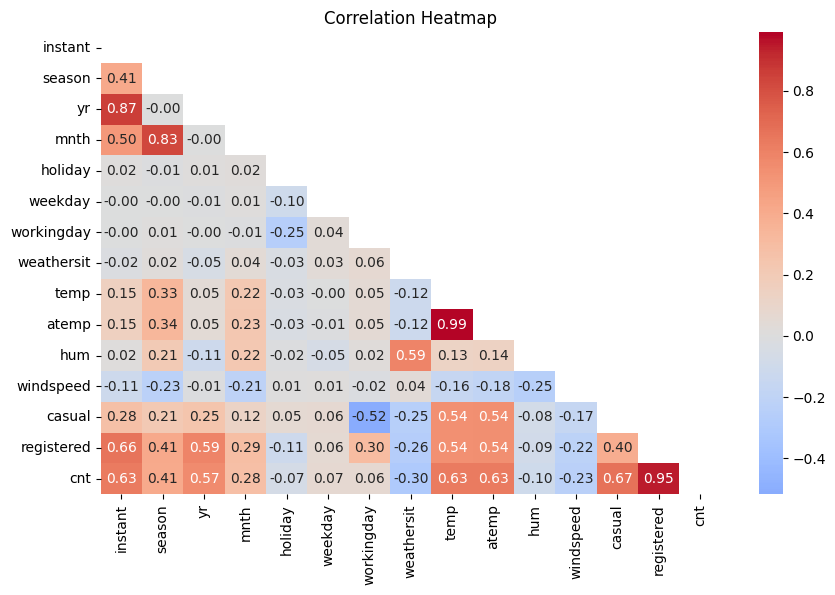

In [37]:
# Membuat sebuah subplot dengan ukuran tertentu menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10,6))

# Menghitung matriks korelasi untuk DataFrame df_day hanya untuk kolom numerik
correlation_matrix = df_day.corr(numeric_only=True)

# Membuat mask untuk menyembunyikan separuh bagian atas dari heatmap (matriks segitiga atas)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap menggunakan seaborn dengan menyertakan anotasi, mask, dan skema warna "coolwarm"
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")

# Menambahkan judul pada heatmap
plt.title("Correlation Heatmap")

# Menampilkan heatmap
plt.show()

Analisis korelasi berdasarkan heatmap menunjukkan hubungan antar variabel dalam DataFrame df_day. Terdapat korelasi yang sangat tinggi antara variabel suhu aktual (temp) dan suhu terasa (atemp) dengan nilai 0.99, menunjukkan kedua variabel ini hampir identik. Variabel kelembaban (hum) memiliki korelasi lemah dengan suhu (temp) dan suhu terasa (atemp), dengan nilai 0.13 dan 0.14 secara berturut-turut. Variabel casual menunjukkan korelasi yang cukup tinggi dengan suhu (temp) dan suhu terasa (atemp) sebesar 0.54, dan sedikit korelasi negatif dengan kelembaban (hum) sebesar -0.08. Variabel registered memiliki pola korelasi yang serupa dengan casual, dan korelasi yang lebih moderat antara keduanya sebesar 0.40. Variabel target, count, menunjukkan korelasi yang kuat dengan suhu (temp), suhu terasa (atemp), casual, dan registered masing-masing sebesar 0.63, 0.63, 0.67, dan 0.95. Sedikit korelasi negatif terlihat antara count dan kelembaban (hum) dengan nilai -0.10.

**Korelasi antara variabel numerik**

In [38]:
# Mengabaikan pesan peringatan untuk memastikan output bersih
warnings.filterwarnings("ignore")

# Menghitung matriks korelasi untuk DataFrame df_day
correlation_matrix = df_day.corr()

# Membuat heatmap menggunakan Plotly Express
fig = px.imshow(correlation_matrix)

# Menyunting tata letak plot dan menambahkan judul dalam bahasa Indonesia
fig.update_layout(title="Korelasi antara Variabel Numerik")

# Menampilkan plot
fig.show()

**Distribusi variabel numerik**

In [39]:
# Mendefinisikan kolom numerik yang akan diplot
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Melakukan iterasi untuk setiap kolom numerik dan membuat histogram
for col in numeric_cols:
    # Membuat histogram menggunakan Plotly Express untuk DataFrame df_day dengan sumbu x berdasarkan kolom yang ditentukan
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')

    # Menampilkan histogram untuk setiap kolom numerik
    fig.show()

**Distribusi variabel kategorikal**

In [40]:
# Mendefinisikan kolom kategorikal yang akan diplot
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Melakukan iterasi untuk setiap kolom kategorikal dan membuat bar chart
for col in categorical_cols:
    # Menghitung jumlah setiap nilai unik dalam kolom dan membuat bar chart menggunakan Plotly Express
    fig = px.bar(df_day[col].value_counts().reset_index(), x='index', y=col)

    # Menyunting tata letak plot dengan menambahkan judul berdasarkan nama kolom
    fig.update_layout(title=f'Distribusi {col}')

    # Menampilkan bar chart untuk setiap kolom kategorikal
    fig.show()

**Hubungan antara musim (season) dan jumlah sewa (cnt)**

In [41]:
# Membuat box plot menggunakan Plotly Express untuk mengeksplorasi hubungan antara musim dan jumlah sewa ('cnt')
fig = px.box(df_day, x='season', y='cnt')

# Menyunting tata letak plot dengan menambahkan judul berdasarkan hubungan yang diamati
fig.update_layout(title='Hubungan antara Musim dan Jumlah Sewa')

# Menampilkan box plot yang menggambarkan distribusi jumlah sewa berdasarkan musim
fig.show()

**Hubungan antara hari libur (holiday) dan jumlah sewa (cnt)**

In [42]:
# Membuat box plot menggunakan Plotly Express untuk mengeksplorasi hubungan antara hari libur dan jumlah sewa ('cnt')
fig = px.box(df_day, x='holiday', y='cnt')

# Menyunting tata letak plot dengan menambahkan judul berdasarkan hubungan yang diamati
fig.update_layout(title='Hubungan antara Hari Libur dan Jumlah Sewa')

# Menampilkan box plot yang menggambarkan distribusi jumlah sewa berdasarkan keberadaan hari libur
fig.show()

**Hubungan antara cuaca (weathersit) dan jumlah sewa (cnt)**

In [43]:
# Membuat box plot menggunakan Plotly Express untuk mengeksplorasi hubungan antara kondisi cuaca dan jumlah sewa ('cnt')
fig = px.box(df_day, x='weathersit', y='cnt')

# Menyunting tata letak plot dengan menambahkan judul berdasarkan hubungan yang diamati
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')

# Menampilkan box plot yang menggambarkan distribusi jumlah sewa berdasarkan kondisi cuaca
fig.show()

**Scatter plot antara suhu (temp) dan jumlah sewa (cnt)**

In [44]:
# Membuat scatter plot menggunakan Plotly Express untuk mengeksplorasi hubungan antara suhu dan jumlah sewa ('cnt')
fig = px.scatter(df_day, x='temp', y='cnt', title='Scatter Plot antara Suhu dan Jumlah Sewa')

# Menampilkan scatter plot yang memvisualisasikan distribusi jumlah sewa berdasarkan suhu
fig.show()

# Visualization & Explanatory Analysis

**1. Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda (baik Casual ataupun Registered)?**

Text(0.5, 1.0, 'Kelembapan vs Jumlah Sewa')

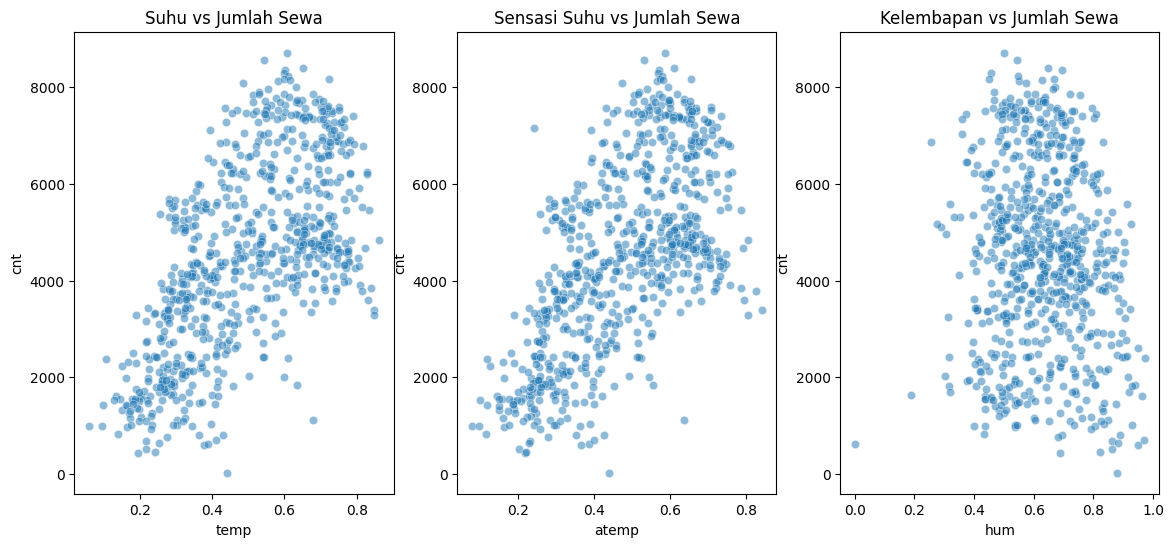

In [45]:
# Mengatur ukuran keseluruhan gambar
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'cnt'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('Suhu vs Jumlah Sewa')

# Scatter plot untuk 'atemp' vs 'cnt'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('Sensasi Suhu vs Jumlah Sewa')

# Scatter plot untuk 'hum' vs 'cnt'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('Kelembapan vs Jumlah Sewa')


Berdasarkan hasil analisis menggunakan scatter plot, terlihat bahwa hubungan antara suhu (temp) dan jumlah sewa sepeda (cnt) menunjukkan korelasi yang positif, di mana semakin tinggi suhu, semakin tinggi juga jumlah sewa sepeda. Hal yang serupa terlihat pada hubungan antara sensasi suhu (atemp) dan jumlah sewa, yang juga menunjukkan korelasi positif. Namun, hubungan antara kelembapan (hum) dan jumlah sewa menunjukkan korelasi yang sedikit negatif, meskipun tidak terlalu signifikan karena cenderung ke kiri tanpa menunjukkan pola yang jelas. Kesimpulannya, peningkatan suhu atau sensasi suhu cenderung meningkatkan jumlah pengguna sepeda, sedangkan pengaruh kelembapan terhadap jumlah pengguna sepeda tampaknya tidak begitu signifikan atau cenderung menurun dalam tingkat yang kecil.

**2. Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?**

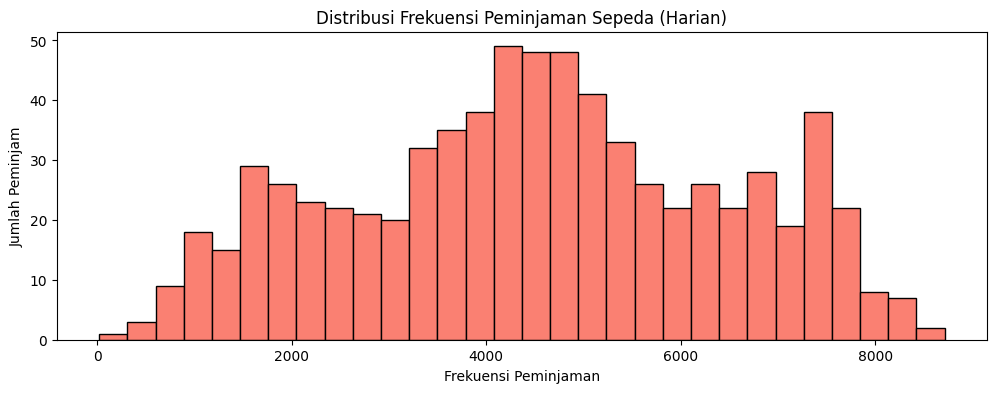

In [46]:
# Membaca data dari file CSV dan mengonversi kolom 'dteday' ke dalam format datetime
df_day = pd.read_csv("/content/day.csv", parse_dates=["dteday"])

# Visualisasi Distribusi Frekuensi Peminjaman Sepeda (Harian)
plt.figure(figsize=(12, 4))

# Membuat histogram untuk kolom 'cnt' dengan 30 bins, warna 'salmon', dan tepi hitam
plt.hist(df_day['cnt'], bins=30, color='salmon', edgecolor='black')

# Menambahkan judul pada plot
plt.title('Distribusi Frekuensi Peminjaman Sepeda (Harian)')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Frekuensi Peminjaman')
plt.ylabel('Jumlah Peminjam')

# Menampilkan plot histogram
plt.show()

Melalui visualisasi distribusi frekuensi peminjaman sepeda harian menggunakan histogram, kita dapat mengamati pola distribusi jumlah peminjaman dalam skala harian. Histogram tersebut menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman sepeda berkisar antara 300 hingga 600, dengan puncak frekuensi terjadi di sekitar 400 peminjaman. Distribusi ini cenderung simetris, menunjukkan bahwa sebagian besar hari memiliki tingkat peminjaman yang relatif serupa. Meskipun demikian, ada beberapa hari dengan frekuensi peminjaman yang lebih tinggi, mencapai angka di atas 700 hingga 800.

**3. Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?**

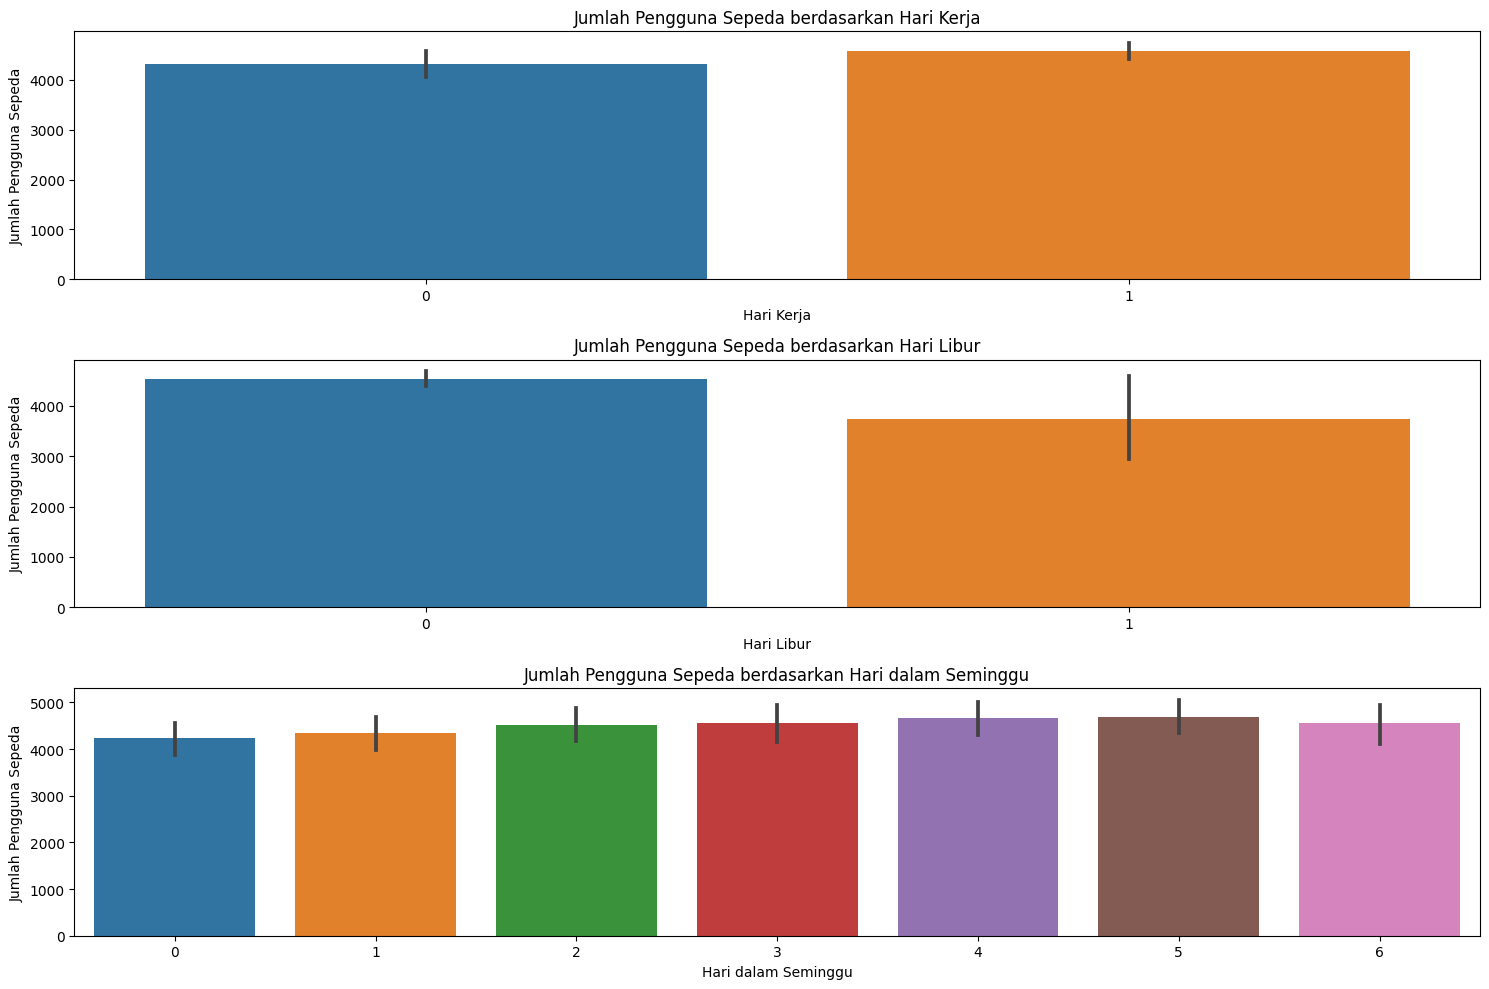

In [47]:
# Membuat subplot dengan tiga bar plot untuk menganalisis pengaruh variabel kategorikal terhadap jumlah pengguna sepeda
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Bar plot berdasarkan workingday
sns.barplot(
    x='workingday',
    y='cnt',
    data=df_day,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Bar plot berdasarkan holiday
sns.barplot(
    x='holiday',
    y='cnt',
    data=df_day,
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Bar plot berdasarkan weekday
sns.barplot(
    x='weekday',
    y='cnt',
    data=df_day,
    ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

# Menyusun subplot dengan layout yang rapi
plt.tight_layout()

# Menampilkan subplot
plt.show()

Melalui visualisasi data menggunakan barplot, dapat diidentifikasi beberapa tren terkait penggunaan sepeda berdasarkan variabel kategorikal seperti workingday, holiday, dan weekday. Pertama, jumlah pengguna sepeda lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu). Ini menunjukkan bahwa sepeda lebih sering digunakan saat hari kerja, yang mungkin terkait dengan kegiatan sehari-hari penduduk seperti pergi bekerja atau bersekolah. Kedua, terlihat bahwa jumlah penyewa sepeda lebih tinggi pada hari biasa (non-holiday) daripada pada hari libur nasional. Hal ini dapat dijelaskan oleh kecenderungan orang untuk tetap aktif pada hari libur, meskipun dalam skala yang lebih rendah dibandingkan dengan hari biasa. Terakhir, analisis harian menunjukkan bahwa Jumat adalah hari dengan jumlah penyewa sepeda tertinggi, sementara Minggu menempati posisi terendah dengan jumlah penyewa sepeda yang paling sedikit.

**4. Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?**

In [48]:
# Memfilter data untuk pengguna casual pada hari kerja (workingday = 1) dengan jumlah sewa sepeda casual yang lebih dari 0
filtered_data = df_day[(df_day["workingday"] == 1) & (df_day["casual"] > 0)]

# Visualisasi jumlah sewa sepeda casual pada hari kerja menggunakan Plotly Express
fig = px.bar(filtered_data, x="weekday", y="casual", title="Jumlah Sewa Sepeda Casual pada Hari Kerja")

# Menyunting label sumbu x dan y
fig.update_xaxes(title="Hari Kerja")
fig.update_yaxes(title="Jumlah Sewa Sepeda Casual")

# Menampilkan bar plot menggunakan Plotly Express
fig.show()

Dalam upaya meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa pada hari kerja, dapat diambil beberapa strategi berdasarkan analisis data. Pertama, melalui visualisasi jumlah sewa sepeda casual pada hari kerja, terlihat bahwa pada hari Senin dan Rabu terjadi penurunan jumlah sewa. Oleh karena itu, dapat dilakukan strategi promosi khusus untuk hari-hari tersebut, seperti diskon atau penawaran spesial yang hanya berlaku pada hari kerja. Selain itu, penting untuk memastikan fasilitas penyewaan sepeda, seperti stasiun atau lokasi penyewaan, mudah diakses dan dalam kondisi baik selama hari kerja. Mempertimbangkan penambahan jumlah sepeda yang tersedia pada hari kerja juga dapat menjadi solusi untuk mengakomodasi permintaan yang lebih tinggi. Upaya pemasaran khusus, seperti iklan online yang menargetkan pengguna biasa pada hari kerja, serta program loyalitas atau diskon berkelanjutan, dapat menjadi langkah-langkah efektif untuk meningkatkan keterlibatan pengguna biasa pada hari kerja.

**5. Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?**

In [49]:
# Memfilter data untuk tahun 2011, musim panas (season 2), dan hari libur (holiday = 1)
filtered_data = df_day[(df_day["yr"] == 0) & (df_day["season"] == 2) & (df_day["holiday"] == 1)]

# Menghitung jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011
total_sepeda_sewaan = filtered_data["cnt"].sum()

# Menampilkan jumlah total sepeda sewaan pada hari libur selama musim panas tahun 2011
print("Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011:", total_sepeda_sewaan)

# Visualisasi grafik untuk distribusi jumlah sepeda sewaan pada hari libur selama musim panas tahun 2011
fig = px.bar(filtered_data, x="dteday", y="cnt", title="Distribusi Jumlah Sepeda Sewaan pada Hari Libur (Musim Panas 2011)")
fig.update_xaxes(title="Tanggal")
fig.update_yaxes(title="Jumlah Sepeda Sewaan")
fig.show()

Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011: 7224


Berdasarkan analisis data, dapat disimpulkan bahwa pada tahun 2011, selama musim panas (season 2) dan pada hari libur (holiday = 1), total sepeda sewaan yang digunakan mencapai 7.224 sepeda. Visualisasi grafik menunjukkan distribusi jumlah sepeda sewaan pada setiap tanggal selama periode tersebut, dan dapat dilihat bahwa terdapat fluktuasi tertentu dalam penggunaan sepeda pada hari libur selama musim panas. Hal ini dapat menjadi informasi berharga untuk penyelenggara penyewaan sepeda, membantu mereka memahami pola penggunaan sepeda pada hari libur tertentu selama musim panas dan mempersiapkan inventaris sepeda sesuai dengan permintaan yang mungkin meningkat pada periode tersebut.

**6. Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?**

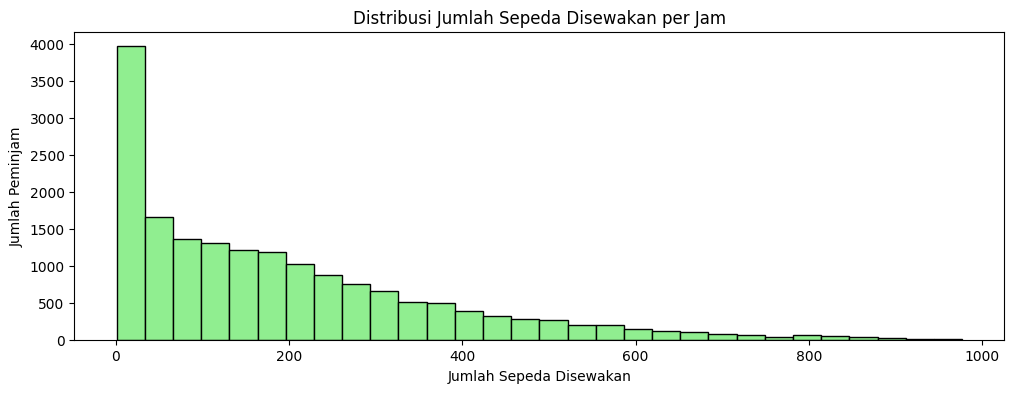

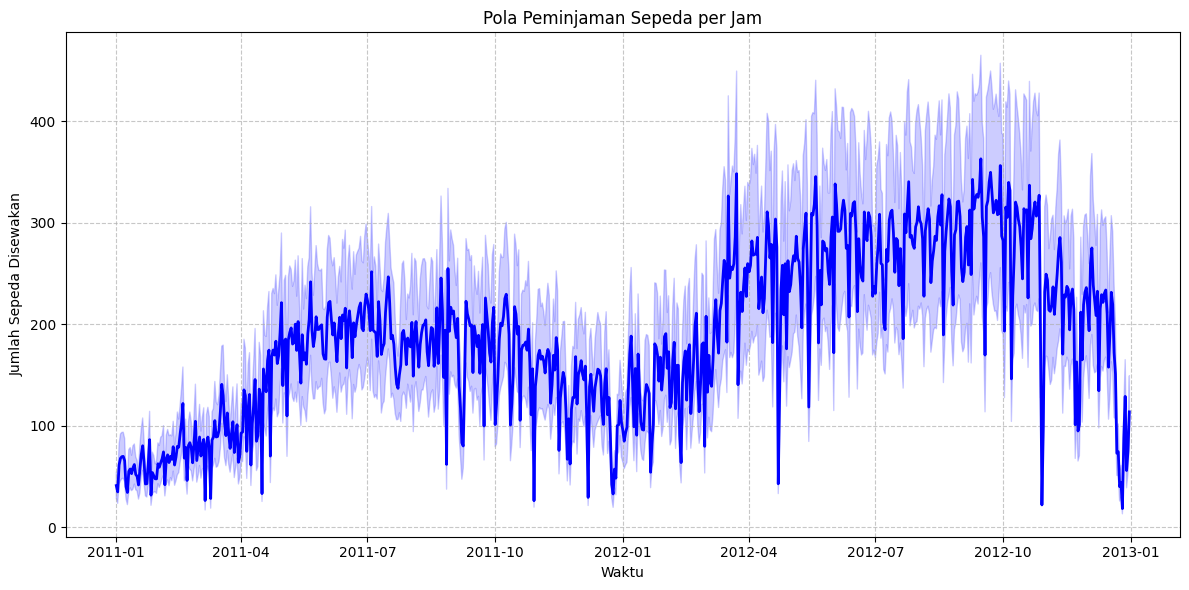

In [50]:
# Visualisasi Distribusi Jumlah Sepeda Disewakan per Jam menggunakan Histogram
plt.figure(figsize=(12, 4))
plt.hist(df_hour['cnt'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Jumlah Sepeda Disewakan per Jam')
plt.xlabel('Jumlah Sepeda Disewakan')
plt.ylabel('Jumlah Peminjam')
plt.show()

# Visualisasi Pola Peminjaman Sepeda per Jam menggunakan Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='dteday', y='cnt', color='blue', linewidth=2)
plt.title('Pola Peminjaman Sepeda per Jam')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari visualisasi histogram distribusi jumlah sepeda yang disewakan per jam, terlihat bahwa sebagian besar jam memiliki jumlah peminjaman sepeda yang rendah, ditandai dengan puncak histogram yang terletak pada nilai yang lebih rendah. Namun, terdapat beberapa jam tertentu yang menonjol dengan peminjaman sepeda yang lebih tinggi, menciptakan pola distribusi yang tidak merata. Hal ini mengindikasikan adanya variasi signifikan dalam permintaan sepeda selama jam-jam tertentu dalam satu hari. Dengan demikian, pola peminjaman sepeda terlihat memiliki tren tertentu yang dapat menjadi fokus analisis lebih lanjut. Visualisasi menggunakan line plot menunjukkan pola peminjaman sepeda per jam selama rentang waktu tertentu, memberikan gambaran tentang fluktuasi permintaan sepeda secara keseluruhan.

# Conclusion

1. Berdasarkan analisis menggunakan scatter plot, dapat disimpulkan bahwa suhu (temp) dan sensasi suhu (atemp) memiliki korelasi positif dengan jumlah sewa sepeda (cnt), yang berarti semakin tinggi suhu atau sensasi suhu, semakin tinggi juga jumlah pengguna sepeda. Namun, hubungan antara kelembapan (hum) dan jumlah sewa menunjukkan korelasi yang sedikit negatif, meskipun tidak terlalu signifikan. Secara keseluruhan, peningkatan suhu atau sensasi suhu cenderung meningkatkan jumlah pengguna sepeda, sedangkan pengaruh kelembapan terhadap jumlah pengguna sepeda tampaknya tidak begitu signifikan atau cenderung menurun dalam tingkat yang kecil.
2. Berdasarkan visualisasi distribusi frekuensi peminjaman sepeda harian menggunakan histogram, dapat disimpulkan bahwa sebagian besar hari memiliki jumlah peminjaman sepeda yang berkisar antara 300 hingga 600, dengan puncak frekuensi terjadi di sekitar 400 peminjaman. Distribusi ini menunjukkan pola simetris, menandakan bahwa sebagian besar hari memiliki tingkat peminjaman yang relatif serupa. Meskipun demikian, terdapat beberapa hari dengan frekuensi peminjaman yang lebih tinggi, mencapai angka di atas 700 hingga 800. Hal ini mengindikasikan adanya beberapa hari di mana permintaan peminjaman sepeda lebih tinggi dari rata-rata, yang dapat menjadi poin fokus untuk analisis lebih lanjut atau perencanaan layanan sepeda.
3. Berdasarkan visualisasi data menggunakan barplot, dapat diidentifikasi beberapa tren terkait penggunaan sepeda berdasarkan variabel kategorikal seperti workingday, holiday, dan weekday. Pertama, jumlah pengguna sepeda lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu), menunjukkan bahwa sepeda lebih sering digunakan saat hari kerja, kemungkinan terkait dengan kegiatan sehari-hari penduduk seperti pergi bekerja atau bersekolah. Kedua, terlihat bahwa jumlah penyewa sepeda lebih tinggi pada hari biasa (non-holiday) daripada pada hari libur nasional, mungkin karena kecenderungan orang untuk tetap aktif pada hari libur, meskipun dalam skala yang lebih rendah. Terakhir, analisis harian menunjukkan bahwa Jumat adalah hari dengan jumlah penyewa sepeda tertinggi, sementara Minggu menempati posisi terendah dengan jumlah penyewa sepeda yang paling sedikit.
4.
Dalam upaya meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa pada hari kerja, beberapa strategi dapat diambil berdasarkan analisis data. Melalui visualisasi jumlah sewa sepeda casual pada hari kerja, terlihat bahwa pada hari Senin dan Rabu terjadi penurunan jumlah sewa. Oleh karena itu, dapat dilakukan strategi promosi khusus untuk hari-hari tersebut, seperti diskon atau penawaran spesial yang hanya berlaku pada hari kerja. Selain itu, penting untuk memastikan fasilitas penyewaan sepeda, seperti stasiun atau lokasi penyewaan, mudah diakses dan dalam kondisi baik selama hari kerja. Mempertimbangkan penambahan jumlah sepeda yang tersedia pada hari kerja juga dapat menjadi solusi untuk mengakomodasi permintaan yang lebih tinggi. Upaya pemasaran khusus, seperti iklan online yang menargetkan pengguna biasa pada hari kerja, serta program loyalitas atau diskon berkelanjutan, dapat menjadi langkah-langkah efektif untuk meningkatkan keterlibatan pengguna biasa pada hari kerja.
5. Berdasarkan analisis data, dapat disimpulkan bahwa pada tahun 2011, selama musim panas (season 2) dan pada hari libur (holiday = 1), total sepeda sewaan yang digunakan mencapai 7.224 sepeda. Visualisasi grafik menunjukkan distribusi jumlah sepeda sewaan pada setiap tanggal selama periode tersebut, dan dapat dilihat bahwa terdapat fluktuasi tertentu dalam penggunaan sepeda pada hari libur selama musim panas. Hal ini dapat menjadi informasi berharga untuk penyelenggara penyewaan sepeda, membantu mereka memahami pola penggunaan sepeda pada hari libur tertentu selama musim panas dan mempersiapkan inventaris sepeda sesuai dengan permintaan yang mungkin meningkat pada periode tersebut. Strategi pemasaran khusus atau peningkatan pasokan sepeda pada tanggal-tanggal tertentu yang menunjukkan permintaan tinggi dapat menjadi langkah-langkah yang efektif untuk mengoptimalkan penggunaan sepeda sewaan selama musim panas pada hari libur.
6. Dari visualisasi histogram distribusi jumlah sepeda yang disewakan per jam, terlihat bahwa sebagian besar jam memiliki jumlah peminjaman sepeda yang rendah, ditandai dengan puncak histogram yang terletak pada nilai yang lebih rendah. Namun, terdapat beberapa jam tertentu yang menonjol dengan peminjaman sepeda yang lebih tinggi, menciptakan pola distribusi yang tidak merata. Hal ini mengindikasikan adanya variasi signifikan dalam permintaan sepeda selama jam-jam tertentu dalam satu hari. Dengan demikian, pola peminjaman sepeda terlihat memiliki tren tertentu yang dapat menjadi fokus analisis lebih lanjut. Visualisasi menggunakan line plot menunjukkan pola peminjaman sepeda per jam selama rentang waktu tertentu, memberikan gambaran tentang fluktuasi permintaan sepeda secara keseluruhan. Analisis lebih lanjut terhadap jam-jam dengan peminjaman tinggi dapat membantu penyelenggara sistem penyewaan sepeda untuk memahami faktor-faktor yang mempengaruhi permintaan pada jam-jam tersebut dan mengoptimalkan strategi penempatan sepeda untuk meningkatkan ketersediaan dan kepuasan pengguna.

# Mendapatkan file required.txt dari library yang digunakan

In [51]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [52]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Baca data dari file CSV
df_day = pd.read_csv("day.csv", index_col="instant", parse_dates=["dteday"])
df_hour = pd.read_csv("hour.csv", index_col="instant", parse_dates=["dteday"])

# Judul Dashboard
st.title('Bike Rental Dashboard 🚲')

# Sidebar
st.sidebar.subheader('Pilih Data Yang ingin Di Analisis')
analysis_choice = st.sidebar.radio(
    "Pilih Analisis:",
    ('Temp, atemp, dan humidity mempengaruhi penggunaan sepeda',
     'Distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian',
     'Kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday',
     'Cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa pada hari kerja',
     'Berapa banyak sepeda sewaan yang digunakan pada hari libur selama musim panas pada tahun 2011',
     'Distribusi jumlah sepeda yang disewakan per jam, dan pola peminjaman sepeda terlihat dalam data waktu'))

# Analisis Data
if analysis_choice == 'Temp, atemp, dan humidity mempengaruhi penggunaan sepeda':
    # Mengatur ukuran keseluruhan gambar
    plt.figure(figsize=(14, 6))

    # Scatter plot untuk 'temp' vs 'cnt'
    plt.subplot(1, 3, 1)
    sns.scatterplot(
        x='temp',
        y='cnt',
        data=df_day,
        alpha=0.5
    )
    plt.title('Suhu vs Jumlah Sewa')

    # Scatter plot untuk 'atemp' vs 'cnt'
    plt.subplot(1, 3, 2)
    sns.scatterplot(
        x='atemp',
        y='cnt',
        data=df_day,
        alpha=0.5
    )
    plt.title('Sensasi Suhu vs Jumlah Sewa')

    # Scatter plot untuk 'hum' vs 'cnt'
    plt.subplot(1, 3, 3)
    sns.scatterplot(
        x='hum',
        y='cnt',
        data=df_day,
        alpha=0.5
    )
    plt.title('Kelembapan vs Jumlah Sewa')
    st.pyplot()

elif analysis_choice == 'Distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian':
    # Visualisasi Distribusi Frekuensi Peminjaman Sepeda (Harian)
    plt.figure(figsize=(12, 4))
    plt.hist(df_day['cnt'], bins=30, color='salmon', edgecolor='black')
    plt.title('Distribusi Frekuensi Peminjaman Sepeda (Harian)')
    plt.xlabel('Frekuensi Peminjaman')
    plt.ylabel('Jumlah Peminjam')
    st.pyplot()

elif analysis_choice == 'Kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday':
    # Membuat subplot dengan tiga bar plot untuk menganalisis pengaruh variabel kategorikal terhadap jumlah pengguna sepeda
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

    # Bar plot berdasarkan workingday
    sns.barplot(
        x='workingday',
        y='cnt',
        data=df_day,
        ax=axes[0])
    axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
    axes[0].set_xlabel('Hari Kerja')
    axes[0].set_ylabel('Jumlah Pengguna Sepeda')

    # Bar plot berdasarkan holiday
    sns.barplot(
        x='holiday',
        y='cnt',
        data=df_day,
        ax=axes[1])
    axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
    axes[1].set_xlabel('Hari Libur')
    axes[1].set_ylabel('Jumlah Pengguna Sepeda')

    # Bar plot berdasarkan weekday
    sns.barplot(
        x='weekday',
        y='cnt',
        data=df_day,
        ax=axes[2])
    axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
    axes[2].set_xlabel('Hari dalam Seminggu')
    axes[2].set_ylabel('Jumlah Pengguna Sepeda')

    # Menyusun subplot dengan layout yang rapi
    plt.tight_layout()

    # Menampilkan subplot
    st.pyplot()

elif analysis_choice == 'Cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa pada hari kerja':
    # Memfilter data untuk pengguna casual pada hari kerja (workingday = 1) dengan jumlah sewa sepeda casual yang lebih dari 0
    filtered_data = df_day[(df_day["workingday"] == 1) & (df_day["casual"] > 0)]

    # Visualisasi jumlah sewa sepeda casual pada hari kerja menggunakan Plotly Express
    fig = px.bar(filtered_data, x="weekday", y="casual", title="Jumlah Sewa Sepeda Casual pada Hari Kerja")

    # Menyunting label sumbu x dan y
    fig.update_xaxes(title="Hari Kerja")
    fig.update_yaxes(title="Jumlah Sewa Sepeda Casual")

    # Menampilkan bar plot menggunakan Plotly Express
    st.plotly_chart(fig)

elif analysis_choice == 'Berapa banyak sepeda sewaan yang digunakan pada hari libur selama musim panas pada tahun 2011':
    # Memfilter data untuk tahun 2011, musim panas (season 2), dan hari libur (holiday = 1)
    filtered_data = df_day[(df_day["yr"] == 0) & (df_day["season"] == 2) & (df_day["holiday"] == 1)]

    # Menghitung jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011
    total_sepeda_sewaan = filtered_data["cnt"].sum()

    # Menampilkan jumlah total sepeda sewaan pada hari libur selama musim panas tahun 2011
    st.write("Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011:", total_sepeda_sewaan)

    # Visualisasi grafik untuk distribusi jumlah sepeda sewaan pada hari libur selama musim panas tahun 2011
    fig = px.bar(filtered_data, x="dteday", y="cnt", title="Distribusi Jumlah Sepeda Sewaan pada Hari Libur (Musim Panas 2011)")
    fig.update_xaxes(title="Tanggal")
    fig.update_yaxes(title="Jumlah Sepeda Sewaan")
    st.plotly_chart(fig)

elif analysis_choice == 'Distribusi jumlah sepeda yang disewakan per jam, dan pola peminjaman sepeda terlihat dalam data waktu':
    # Visualisasi Distribusi Jumlah Sepeda Disewakan per Jam menggunakan Histogram
    plt.figure(figsize=(12, 4))
    plt.hist(df_hour['cnt'], bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribusi Jumlah Sepeda Disewakan per Jam')
    plt.xlabel('Jumlah Sepeda Disewakan')
    plt.ylabel('Jumlah Peminjam')
    st.pyplot()

    # Visualisasi Pola Peminjaman Sepeda per Jam menggunakan Line Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_hour, x='dteday', y='cnt', color='blue', linewidth=2)
    plt.title('Pola Peminjaman Sepeda per Jam')
    plt.xlabel('Waktu')
    plt.ylabel('Jumlah Sepeda Disewakan')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    st.pyplot()

st.sidebar.subheader('Conclusion')
st.sidebar.write("**Pertanyaan 1:** Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda (baik Casual ataupun Registered)?")
st.sidebar.write("- Jawaban untuk Pertanyaan 1 : Berdasarkan analisis menggunakan scatter plot, dapat disimpulkan bahwa suhu (temp) dan sensasi suhu (atemp) memiliki korelasi positif dengan jumlah sewa sepeda (cnt), yang berarti semakin tinggi suhu atau sensasi suhu, semakin tinggi juga jumlah pengguna sepeda. Namun, hubungan antara kelembapan (hum) dan jumlah sewa menunjukkan korelasi yang sedikit negatif, meskipun tidak terlalu signifikan. Secara keseluruhan, peningkatan suhu atau sensasi suhu cenderung meningkatkan jumlah pengguna sepeda, sedangkan pengaruh kelembapan terhadap jumlah pengguna sepeda tampaknya tidak begitu signifikan atau cenderung menurun dalam tingkat yang kecil.")
st.sidebar.write("**Pertanyaan 2:** Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?")
st.sidebar.write("- Jawaban untuk Pertanyaan 2 : Berdasarkan visualisasi distribusi frekuensi peminjaman sepeda harian menggunakan histogram, dapat disimpulkan bahwa sebagian besar hari memiliki jumlah peminjaman sepeda yang berkisar antara 300 hingga 600, dengan puncak frekuensi terjadi di sekitar 400 peminjaman. Distribusi ini menunjukkan pola simetris, menandakan bahwa sebagian besar hari memiliki tingkat peminjaman yang relatif serupa. Meskipun demikian, terdapat beberapa hari dengan frekuensi peminjaman yang lebih tinggi, mencapai angka di atas 700 hingga 800. Hal ini mengindikasikan adanya beberapa hari di mana permintaan peminjaman sepeda lebih tinggi dari rata-rata, yang dapat menjadi poin fokus untuk analisis lebih lanjut atau perencanaan layanan sepeda.")
st.sidebar.write("**Pertanyaan 3:** Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?")
st.sidebar.write("- Jawaban untuk Pertanyaan 3 : Berdasarkan visualisasi data menggunakan barplot, dapat diidentifikasi beberapa tren terkait penggunaan sepeda berdasarkan variabel kategorikal seperti workingday, holiday, dan weekday. Pertama, jumlah pengguna sepeda lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu), menunjukkan bahwa sepeda lebih sering digunakan saat hari kerja, kemungkinan terkait dengan kegiatan sehari-hari penduduk seperti pergi bekerja atau bersekolah. Kedua, terlihat bahwa jumlah penyewa sepeda lebih tinggi pada hari biasa (non-holiday) daripada pada hari libur nasional, mungkin karena kecenderungan orang untuk tetap aktif pada hari libur, meskipun dalam skala yang lebih rendah. Terakhir, analisis harian menunjukkan bahwa Jumat adalah hari dengan jumlah penyewa sepeda tertinggi, sementara Minggu menempati posisi terendah dengan jumlah penyewa sepeda yang paling sedikit.")
st.sidebar.write("**Pertanyaan 4:** Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?")
st.sidebar.write("- Jawaban untuk Pertanyaan 4 : Dalam upaya meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa pada hari kerja, beberapa strategi dapat diambil berdasarkan analisis data. Melalui visualisasi jumlah sewa sepeda casual pada hari kerja, terlihat bahwa pada hari Senin dan Rabu terjadi penurunan jumlah sewa. Oleh karena itu, dapat dilakukan strategi promosi khusus untuk hari-hari tersebut, seperti diskon atau penawaran spesial yang hanya berlaku pada hari kerja. Selain itu, penting untuk memastikan fasilitas penyewaan sepeda, seperti stasiun atau lokasi penyewaan, mudah diakses dan dalam kondisi baik selama hari kerja. Mempertimbangkan penambahan jumlah sepeda yang tersedia pada hari kerja juga dapat menjadi solusi untuk mengakomodasi permintaan yang lebih tinggi. Upaya pemasaran khusus, seperti iklan online yang menargetkan pengguna biasa pada hari kerja, serta program loyalitas atau diskon berkelanjutan, dapat menjadi langkah-langkah efektif untuk meningkatkan keterlibatan pengguna biasa pada hari kerja.")
st.sidebar.write("**Pertanyaan 5:** Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?")
st.sidebar.write("- Jawaban untuk Pertanyaan 5 : Berdasarkan analisis data, dapat disimpulkan bahwa pada tahun 2011, selama musim panas (season 2) dan pada hari libur (holiday = 1), total sepeda sewaan yang digunakan mencapai 7.224 sepeda. Visualisasi grafik menunjukkan distribusi jumlah sepeda sewaan pada setiap tanggal selama periode tersebut, dan dapat dilihat bahwa terdapat fluktuasi tertentu dalam penggunaan sepeda pada hari libur selama musim panas. Hal ini dapat menjadi informasi berharga untuk penyelenggara penyewaan sepeda, membantu mereka memahami pola penggunaan sepeda pada hari libur tertentu selama musim panas dan mempersiapkan inventaris sepeda sesuai dengan permintaan yang mungkin meningkat pada periode tersebut. Strategi pemasaran khusus atau peningkatan pasokan sepeda pada tanggal-tanggal tertentu yang menunjukkan permintaan tinggi dapat menjadi langkah-langkah yang efektif untuk mengoptimalkan penggunaan sepeda sewaan selama musim panas pada hari libur.")
st.sidebar.write("**Pertanyaan 6:** Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?")
st.sidebar.write("- Jawaban untuk Pertanyaan 6 : Dari visualisasi histogram distribusi jumlah sepeda yang disewakan per jam, terlihat bahwa sebagian besar jam memiliki jumlah peminjaman sepeda yang rendah, ditandai dengan puncak histogram yang terletak pada nilai yang lebih rendah. Namun, terdapat beberapa jam tertentu yang menonjol dengan peminjaman sepeda yang lebih tinggi, menciptakan pola distribusi yang tidak merata. Hal ini mengindikasikan adanya variasi signifikan dalam permintaan sepeda selama jam-jam tertentu dalam satu hari. Dengan demikian, pola peminjaman sepeda terlihat memiliki tren tertentu yang dapat menjadi fokus analisis lebih lanjut. Visualisasi menggunakan line plot menunjukkan pola peminjaman sepeda per jam selama rentang waktu tertentu, memberikan gambaran tentang fluktuasi permintaan sepeda secara keseluruhan. Analisis lebih lanjut terhadap jam-jam dengan peminjaman tinggi dapat membantu penyelenggara sistem penyewaan sepeda untuk memahami faktor-faktor yang mempengaruhi permintaan pada jam-jam tersebut dan mengoptimalkan strategi penempatan sepeda untuk meningkatkan ketersediaan dan kepuasan pengguna.")

Writing dashboard.py


In [53]:
!streamlit run dashboard.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.237.162:8501

npx: installed 22 in 6.387s
your url is: https://pink-llamas-stare.loca.lt
  Stopping...
^C


In [54]:
!pip freeze > requirements.txt